# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import kurtosis
from scipy.stats import skew

# Import Data Set

In [3]:
df=pd.read_csv('delivery_time.csv')

In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# EDA

In [6]:
df.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'},inplace=True)

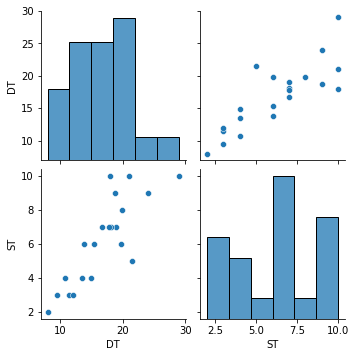

In [7]:
sns.pairplot(df)

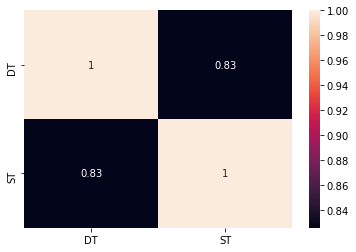

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix=df.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

C:\Users\sanjana\anaconda3\SANJANA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

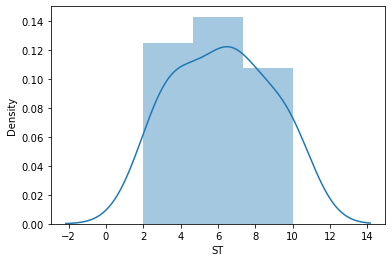

In [9]:
sns.distplot(df['ST'])

C:\Users\sanjana\anaconda3\SANJANA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

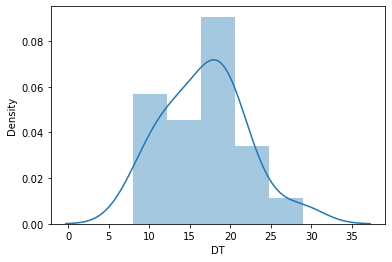

In [10]:
sns.distplot(df['DT'])

In [11]:
print(kurtosis(df.DT))
print(kurtosis(df.ST))

-0.02558576894549036
-1.1653901357029155


In [12]:
print(skew(df.DT))
print(skew(df.ST))

0.326702631656106
0.043680994983108075


<AxesSubplot:>

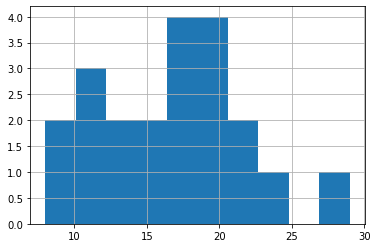

In [13]:
df['DT'].hist()

<AxesSubplot:>

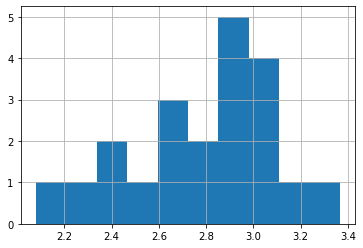

In [14]:
df['log_DT']=np.log(df['DT'])
df['log_DT'].hist()

# Fitting a Linear Regression Model without logarithmic Transformation

In [15]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = df).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

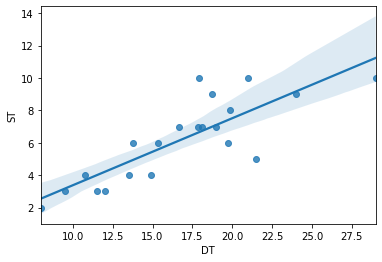

In [16]:
sns.regplot(x="DT", y="ST", data=df)

In [17]:
#Coefficents
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [18]:
#t values and p values
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 May 2021   Prob (F-statistic):           3.98e-06
Time:                        08:54:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df['log_ST']=np.log(df['ST'])

# Fitting a Linear Regression Model with logarithmic Transformation

In [21]:
import statsmodels.formula.api as smf
model_log= smf.ols("log_DT~log_ST",data = df).fit()

<AxesSubplot:xlabel='log_DT', ylabel='log_ST'>

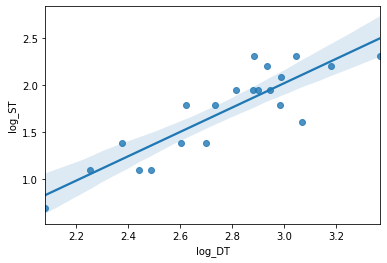

In [22]:
sns.regplot(x="log_DT", y="log_ST", data=df)

In [23]:
#Coefficents
model_log.params

Intercept    1.741987
log_ST       0.597522
dtype: float64

In [24]:
#t values and p values
print(model_log.tvalues, '\n', model_log.pvalues)

Intercept    13.085552
log_ST        8.024484
dtype: float64 
 Intercept    5.921137e-11
log_ST       1.601539e-07
dtype: float64


In [25]:
#R squared values
(model_log.rsquared,model_log.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [68]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.60e-07
Time:                        08:52:35   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_ST         0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Quadratic transformation Model

In [26]:
df['sqrt_DT']=np.sqrt(df['DT'])
df['sqrt_ST']=np.sqrt(df['ST'])

In [27]:
import statsmodels.formula.api as smf
model_sqrt= smf.ols("sqrt_DT~sqrt_ST",data = df).fit()

<AxesSubplot:xlabel='sqrt_DT', ylabel='sqrt_ST'>

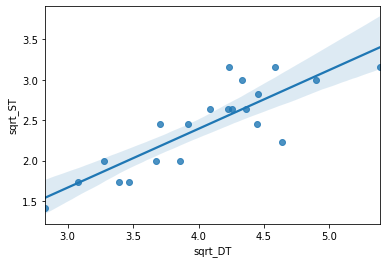

In [28]:
sns.regplot(x="sqrt_DT", y="sqrt_ST", data=df)

In [29]:
(model_sqrt.rsquared,model_sqrt.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

Testing my Model

In [58]:
newdata=pd.Series([20,30,14])

In [59]:
newdata

0    20
1    30
2    14
dtype: int64

In [66]:
df_newdata=pd.DataFrame(newdata,columns=['log_ST'])

In [67]:
model_log.predict(df_newdata)

0    13.692434
1    19.667657
2    10.107300
dtype: float64

In [ ]:
For ST of 20,30,14 machine predicted delivery time as 13.6924,19.6676,10.1073